**Créditos**: El contenido de este cuaderno ha sido tomado de varias fuentes, como: [Mauricio Cordeiro](https://cordmaur.medium.com/), [Dorothy Rono](https://medium.com/euro-data-cube/harness-the-power-of-sentinel-hub-xcube-eoxhub-geodb-and-more-in-euro-data-cube-31c827a3083b), pero especialmente de los cursos y libros publicados abierta y libremente por [Dani Arribas-Bel](http://darribas.org/) - Universidad de Liverpool & - Sergio Rey - [Centro de Ciencias Geoespaciales, Universidad de California, Riverside](http://spatial.ucr.edu/peopleRey.html). El autor se disculpa por cualquier omisión involuntaria y estaría encantado de agregar un reconocimiento en futuras ediciones.


## Datos espaciales

Los datos geográficos tienen dos características muy útiles su ubicación y la relacion con sus vecinos. Todo tiene una **ubicación*** en el espacio-tiempo, y esta ubicación puede usarse directamente para hacer mejores predicciones o inferencias. Además, esta ubicación te permite comprender las **relaciones** entre las observaciones. A menudo son las relaciones las que son útiles en la ciencia de datos porque nos permiten contextualizar nuestro análisis, creando vínculos dentro de nuestros datos existentes y más allá con otros datos relevantes. Como argumentó el geógrafo Waldo Tobler, las cosas cercanas tienden a estar más relacionadas que las cosas distantes, tanto en el espacio como en el tiempo. Por lo tanto, si aprendemos de los alrededores de manera adecuada, es posible que podamos construir mejores modelos. Un **patrón espacial** observado puede deberse estrictamente a variables **dependientes de la ubicación**, o debido a **interacciones directas** entre los puntos.

Los datos espaciales son **datos referenciados geográficamente**, proporcionados en ubicaciones conocidas y a menudo representados visualmente a través de mapas. Esa referencia geográfica, o el componente de ubicación de los datos, puede representarse utilizando cualquier sistema de referencia de coordenadas, por ejemplo, geografica o proyectada.

Los datos geoespaciales son datos sobre objetos, eventos o fenómenos que tienen una ubicación en la superficie de la tierra, incluyendo información de ubicación, información de atributos (las características del objeto, evento o fenómeno en cuestión) y, a menudo, también información temporal (el tiempo o la duración en que la ubicación y los atributos existen).

En otras palabras, **los datos espaciales son dependientes o correlacionados espacialmente**, y la independencia entre las observaciones, que es una suposición común en muchas técnicas estadísticas, no se cumple. Existe una diferencia fundamental entre la estadística clásica y la estadística espacial. En la estadística clásica, hacemos una suposición básica sobre la muestra: es una colección de **observaciones independientes** que siguen una distribución específica, generalmente normal. Por el contrario, en la estadística espacial, debido a la inherente **dependencia espacial** y al hecho de que generalmente existe **autocorrelación espacial**, el enfoque se centra en adoptar técnicas para detectar y describir estas correlaciones. En otras palabras, en la estadística clásica, debe existir independencia entre las observaciones, mientras que en la estadística espacial, generalmente existe dependencia espacial.

Al igual que un modelo estadístico, un *mapa* es solo una representación del proceso geográfico subyacente. En este sentido, utilizaremos el término **modelo de datos** para referirnos a cómo representamos conceptualmente un proceso geográfico; y usaremos **estructura de datos** para referirnos a cómo se representan los datos geográficos en una computadora. 

## Modelo de datos
La representación conceptual de un proceso geográfico a menudo no es fácil de representar. Por ejemplo, los mapas de densidad de población generalmente requieren que contemos el número de personas que viven dentro de una "área de enumeración" específica, y luego dividimos por el área total. Esto representa la densidad del área como un valor constante en toda la unidad de enumeración. Pero, las personas (de hecho) son discretas: cada uno de nosotros existe solo en un punto específico en el espacio y el tiempo. Entonces, a una escala de medición suficientemente detallada (tanto en tiempo como en espacio), ¡la densidad es cero en la mayoría de los lugares y momentos! Además, en el día típico de una persona, puede moverse del trabajo a casa, posiblemente pasando por algunos puntos en el espacio-tiempo en el proceso. Por ejemplo, la mayoría de los centros comerciales tienen *cero* residentes, pero su densidad de población es muy alta en un momento específico, y atrae a su población de otros lugares.

Este ejemplo de densidad de población ayuda a ilustrar los modelos clásicos de datos en la ciencia de la información geográfica. Los procesos geográficos se representan utilizando *objetos*, *campos* y *redes*.
- **Objetos** son *entidades discretas* que ocupan una posición específica en el espacio y el tiempo.
- **Campos** son *superficies continuas* que, en teoría, podrían medirse en cualquier ubicación en el espacio y el tiempo.
- **Redes** reflejan un conjunto de *conexiones* entre *objetos* o entre posiciones en un *campo*.

En nuestro ejemplo de densidad de población, una "unidad de enumeración" es un objeto, al igual que una persona. La representación en campos conceptualizaría la densidad simplemente como una superficie suave y continua que refleja el número total de personas en cada ubicación posible. La representación de la red representaría el sistema interrelacionado de densidades que surgen de las personas que se desplazan.

## Estructura de Datos
Las estructuras de datos son representaciones computacionales que organizan diferentes tipos de datos en alineación tanto con el modelo que representan como con el propósito que dichos datos cumplen. Forman la capa intermedia que conecta los modelos conceptuales con la tecnología. En el mejor de los casos, acomodan los principios del modelo de datos de la mejor manera posible desde el punto de vista tecnológico. Al hacerlo, las estructuras de datos permiten que los modelos de datos guíen la computación.

<center><img src="https://www.researchgate.net/profile/Alice-Zwerling/publication/30001990/figure/fig2/AS:651893785243661@1532434998703/Schematic-of-possible-attribute-layers-in-a-Geographic-Information-System-GIS-44.png" width="500"></center>

Este es un mundo en evolución que está cambiando rápidamente y redefiniendo cómo traducimos los modelos conceptuales en estructuras computacionales para almacenar datos. Sin embargo, hay algunos estándares clave que han existido durante mucho tiempo y han demostrado su utilidad. En particular: **(i) objetos, (ii) superficies y (iii) gráficos espaciales**. En este libro se tratarán la dos primeras estructuras.

### Objetos
Los objetos almacenan información sobre **tablas geográficas** discretas. Las tablas son estructuras bidimensionales compuestas por filas y columnas; cada fila representa un objeto independiente, mientras que cada columna almacena un atributo de esos objetos. Las tablas geográficas son tablas estándar donde una columna almacena información geográfica. La estructura tabular encaja bien con el modelo de objetos porque divide claramente el espacio en entidades discretas y asigna una geometría a cada entidad según su naturaleza espacial. Más importante aún, las tablas geográficas permiten combinar sin problemas información geográfica y no geográfica. Es casi como si la Geografía fuera simplemente "un atributo más" cuando se trata de almacenamiento y representación en computadora. Esto es poderoso porque existe un amplio soporte en el mundo de las bases de datos para formatos tabulares. Las tablas geográficas integran datos espaciales en este mundo no espacial y le permiten aprovechar gran parte de su poder. Hablando técnicamente, las tablas geográficas están ampliamente respaldadas en una variedad de plataformas. Ejemplos populares incluyen: tablas PostGIS (como una extensión geográfica de PostgreSQL), los marcos de datos `sf` de R o los objetos `GeoDataFrame` de Python, proporcionados por `geopandas`. Aunque cada uno tiene sus particularidades, todos representan implementaciones de un modelo de objetos.

* Shapefile [.shp, .shx, .dbf, (.prj, .sbn, .sbx, .xml)] --> geodatabase (.gdb)
* Geopackage (.gpkg)
* .GeoJSON
* .KML
* .GML
* .SVG
* .DWG

[Mapshaper](https://mapshaper.org/)

<center><img src="https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/49570i26EF3FAEACD21BD4/image-size/medium?v=1.0&px=400" width="500"></center>

```Note
Antes de continuar, es útil mencionar una aclaración rápida sobre la terminología. A lo largo de este curso, independientemente de la estructura de datos utilizada, nos referiremos a una medición sobre una observación como una *característica* (feature). Esto es consistente con otros trabajos en ciencia de datos y aprendizaje automático. Luego, un conjunto de mediciones es una *muestra*. Para las tablas, esto significa que una característica es una columna y una muestra es una fila. Sin embargo, históricamente, los científicos de información geográfica han utilizado la palabra "característica" para referirse a una observación individual, ya que una "característica" en cartografía es una entidad en un mapa, y "atributo" para describir las características de esa observación. En otros lugares, una *característica* puede llamarse *variable*, y una *muestra* referirse como un registro. Por lo tanto, la terminología coherente es importante: para este curso, una *característica* es un rasgo medido relacionado con una observación (una columna), y una *muestra* es un conjunto de mediciones (una fila).
```
Para entender la estructura de las tablas geográficas, será útil leer el conjunto de datos `countries_clean.gpkg` que describe los países del mundo. Para leer estos datos, podemos usar el método `read_file()` en `geopandas`.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
countries = gpd.read_file("/content/drive/MyDrive/CATEDRA/ANALISISGEOESPACIAL/AnalisisGeoespacial/Notebooks/mundo/ne_10m_admin_0_map_units.shp")

In [ ]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [ ]:
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Columns: 162 entries, featurecla to geometry
dtypes: float64(4), geometry(1), int64(25), object(132)
memory usage: 377.3+ KB


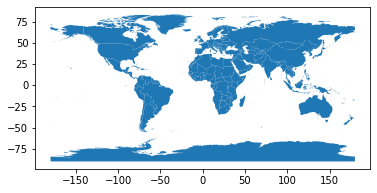

In [ ]:
countries.plot();

<AxesSubplot:>

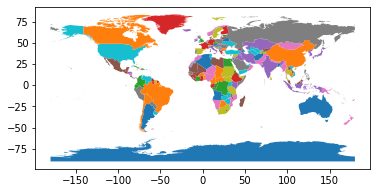

In [ ]:
countries.plot(column='NAME_SORT')

In [ ]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Cada fila de esta tabla es un solo país. Cada país solo tiene dos características: el nombre administrativo del país y la geometría del límite del país. El nombre del país está codificado en la columna `ADMIN` utilizando el tipo `str` de Python, que se utiliza para almacenar datos basados en texto. La geometría del límite del país se almacena en la columna `geometry`, y está codificada utilizando una clase especial en Python que se utiliza para representar objetos geométricos. Al igual que con otras estructuras de datos basadas en tablas en Python, cada fila y columna tienen un índice que los identifica de manera única y se representa en negrita en el lado izquierdo de la tabla. Esta tabla geográfica es una instancia del objeto `geopandas.GeoDataFrame`, utilizado en todo el ecosistema de Python para representar datos geográficos.

Las tablas geográficas almacenan información geográfica como una columna adicional.

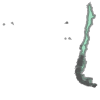

In [ ]:
gt_polygons.geometry[2]

<AxesSubplot:>

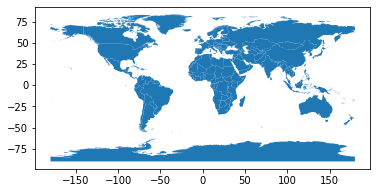

In [ ]:
gt_polygons.plot()

### Superficies
**Superficies** registran mediciones empíricas de **campos**. Los campos son una representación continua del espacio. En principio, hay un conjunto infinito de ubicaciones para las cuales un campo tiene un valor diferente. En la práctica, los campos se miden en un conjunto discreto de ubicaciones. Este objetivo de continuidad en el espacio (y potencialmente en el tiempo) es importante porque se vincula directamente con la forma en que se estructuran los datos. En la práctica, los campos se registran y almacenan en cuadrículas uniformes o matrices cuyas dimensiones están estrechamente relacionadas con la extensión geográfica del área que representan. Las matrices son estructuras bidimensionales, al menos. A diferencia de las tablas geográficas, las matrices de superficies utilizan tanto filas como columnas para significar la ubicación, y los valores de las celdas almacenan información sobre esa ubicación. Una superficie para un fenómeno dado (por ejemplo, la contaminación del aire) se representará como una matriz en la que cada fila estará vinculada a diferentes latitudes y cada columna representará longitudes. Si queremos representar más de un fenómeno (por ejemplo, contaminación del aire y elevación) o el mismo fenómeno en diferentes puntos del tiempo, necesitaremos diferentes matrices, posiblemente conectadas. Estas matrices multidimensionales a veces se denominan **cubos de datos**.

* .img (imagine) --> ERDAS
* GeoTiff (.tif)
* ASCCI (.asc)
* .netCDF

<center><img src="https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/49571iD5C49038B1B61684/image-size/medium?v=1.0&px=400" width="500"></center>

<center><img src="https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/GUID-412D5EE2-475A-4AD0-B3BD-2C4DEB1D667E-web.gif" width="800"></center>

Un **cubo de datos** es una matriz de datos multidimensional. En el dominio de EO, un cubo de datos sirve imágenes satelitales como una matriz multidimensional, generalmente con dos dimensiones espaciales, una dimensión temporal y un número arbitrario de atributos como bandas o índices. La georreferenciación de las imágenes satelitales garantiza que la ubicación del píxel se mantenga coherente entre las diferentes capas del cubo de datos. El objetivo de un cubo de datos es ofrecer a los usuarios datos listos para el análisis, reduciendo así la carga de preprocesamiento y preparación de datos.

<center><img src="https://desktop.arcgis.com/en/arcmap/10.3/tools/space-time-pattern-mining-toolbox/GUID-0FEECE1A-6B54-44B4-AE49-05E7EA849A8B-web.png" width="500"></center>

Para explorar cómo Python representa las superficies, utilizaremos un extracto de la ciudad brasileña de São Paulo de un [conjunto de datos de población global](../data/ghsl/build_ghsl_extract). Este conjunto de datos registra recuentos de población en celdas de las mismas dimensiones que cubren uniformemente la superficie de la Tierra. Nuestro extracto está disponible como un archivo GeoTIF, una variación del formato de imagen TIF que incluye información geográfica. Podemos usar el método `open_rasterio()` del paquete `xarray` para leer el archivo GeoTIF:


In [ ]:
import xarray
import rioxarray
pop = xarray.open_rasterio("https://geographicdata.science/book/_downloads/5263090bd0bdbd7d1635505ff7d36d04/ghsl_sao_paulo.tif")

In [4]:
type(pop)

xarray.core.dataarray.DataArray

`xarray` es un paquete para trabajar con arreglos etiquetados multidimensionales.

In [5]:
pop.coords

Coordinates:
  * band     (band) int64 1
  * y        (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
  * x        (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06

Curiosamente, nuestra superficie tiene *tres* dimensiones: `x`, `y` y `band`. Las dos primeras rastrean la latitud y la longitud que cubre cada celda en nuestra cuadrícula de población. La tercera tiene un solo valor (1) y, en este contexto, no es muy útil. Pero es fácil imaginar contextos en los que una tercera dimensión sería útil. Por ejemplo, una imagen óptica en color puede tener tres bandas: rojo, azul y verde. Sensores más potentes pueden captar bandas adicionales, como el infrarrojo cercano (NIR) o incluso bandas de radio. O una superficie medida a lo largo del tiempo, como los geocubos, tendrá bandas para cada punto en el tiempo en el que se mide el campo. Una superficie geográfica tendrá, por lo tanto, dos dimensiones que registran la ubicación de las celdas (`x` y `y`), y al menos una `band` que registra otras dimensiones relacionadas con nuestros datos.

Un objeto `xarray.DataArray` contiene información adicional sobre los valores almacenados bajo el atributo `attrs`:


In [6]:
pop.attrs

{'transform': (250.0, 0.0, -4482000.0, 0.0, -250.0, -2822000.0),
 'crs': '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs=True',
 'res': (250.0, 250.0),
 'is_tiled': 0,
 'nodatavals': (-200.0,),
 'scales': (1.0,),
 'offsets': (0.0,),
 'AREA_OR_POINT': 'Area',
 'grid_mapping': 'spatial_ref'}

In [ ]:
pop.shape

(1, 416, 468)

In [ ]:
pop.sel(band=1)

<xarray.DataArray (y: 416, x: 468)>
[194688 values with dtype=float32]
Coordinates:
    band     int64 1
  * y        (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
  * x        (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
Attributes:
    transform:      (250.0, 0.0, -4482000.0, 0.0, -250.0, -2822000.0)
    crs:            +proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +...
    res:            (250.0, 250.0)
    is_tiled:       0
    nodatavals:     (-200.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    grid_mapping:   spatial_ref

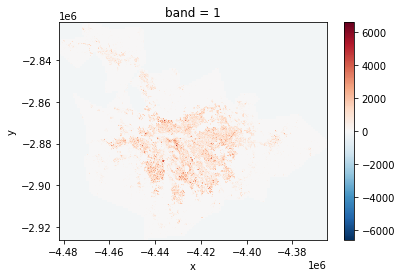

In [7]:
pop.sel(band=1).plot()

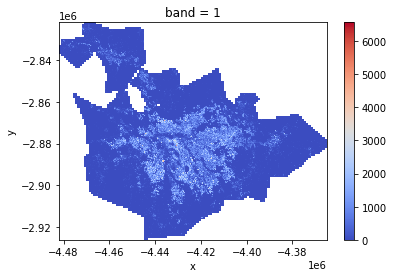

In [9]:
pop.where(pop!=-200).sel(band=1).plot(cmap="coolwarm")

### Redes geográficas}

**Gráficos espaciales** capturan las relaciones entre objetos que están mediadas por el espacio. En cierto sentido, pueden considerarse **redes geográficas**, o una estructura de datos para almacenar topologías. Existen varias formas de definir las relaciones espaciales entre las características. Lo importante a tener en cuenta por ahora es que, independientemente de la regla espacial que sigamos, los gráficos espaciales proporcionan una forma de codificarlas en una estructura de datos que puede admitir análisis. Los gráficos espaciales registran información sobre cómo una observación dada está conectada espacialmente con otras en el conjunto de datos. Por esta razón, son un complemento obvio de las tablas geográficas, que almacenan información sobre observaciones individuales de forma aislada. Los gráficos espaciales también pueden derivarse de superficies, pero aquí la situación es ligeramente diferente porque, aunque las superficies registran mediciones discretas, generalmente se relacionan con un fenómeno continuo. En teoría, uno podría tomar estas mediciones en cualquier punto del espacio, por lo que el gráfico espacial de una superficie debería tener un número infinito de observaciones. En la práctica, sin embargo, los gráficos espaciales *a veces* se utilizan con cuadrículas porque las conexiones y barreras entre modelos y estructuras de datos están desapareciendo muy rápidamente. Dado que muchos campos tienen constructos teóricos que se asemejan a gráficos espaciales, existen varias estructuras de datos ligeramente diferentes que los almacenan tanto en memoria como en disco.

<center><img src="https://d3i71xaburhd42.cloudfront.net/2296001907aa03c91226a66a644b1c047b2a5ae9/11-Figure6-1.png" width="1000"></center>

El término gráfico espacial a veces se utiliza indistintamente con el de **red espacial**. Esto, por supuesto, es una cuestión de convenciones de nomenclatura y, en la medida en que solo es eso, no es muy importante. Sin embargo, la confusión a veces puede reflejar un malentendido más profundo de lo que se está representando. Tomemos el ejemplo de las calles en una ciudad o el sistema interconectado de ríos en un área de captación. Ambos se suelen denominar redes, aunque en muchos casos lo que se registra en realidad es una colección de objetos almacenados en una tabla geográfica. Para aclarar la distinción, debemos pensar en qué aspecto del diseño de la calle o del sistema fluvial queremos registrar. Si es la forma exacta, longitud y ubicación de cada segmento o arroyo, esto se parece mucho más a una colección de líneas o polígonos independientes que "se tocan" en sus extremos. Si lo que nos interesa es entender cómo se *relaciona* cada segmento o río entre sí, qué está conectado con qué y cómo este conjunto de conexiones individuales se convierte en un sistema interconectado más amplio, entonces un gráfico espacial es una estructura más útil para usar. Esta dicotomía entre el objeto y el gráfico es solo un ejemplo de un punto más amplio sobre cómo usamos modelos y estructuras de datos y cómo cuál es el *correcto* no depende solo del fenómeno que estamos tratando de capturar, sino también del porqué queremos representarlo y cuál es el objetivo.

La separación de raster/imagen de vector/tabla y la omisión general de redes provienen de decisiones de implementación realizadas en uno de los primeros sistemas de información geográfica comercialmente exitosos, el paquete ARC/INFO del Instituto de Investigación Ambiental. Este fue un precursor en la línea de comandos de los sistemas modernos de procesamiento de información gráfica, como QGIS gratuito y de código abierto o los paquetes ArcGIS del Instituto de Investigación Ambiental (ESRI). Esta asociación entre campo-y-raster, objeto-y-vector a veces se denomina la "visión de escritorio" de la información geográfica debido al dominio de estos paquetes GIS gráficos.